# Missing Values



### MCAR vs MAR vs MNAR

Imagine we are hosting a campaign to measure serological factors associated with hepatitis for patients suspected to have such disease.


* MCAR is when the probablity that a values becomes missing is equal across all values. Usually happens due to flawed methodology 
        
        Our kit can be broken in the middle of campaign, so some patients just have bad luck and would result in missing values in the data 
* MAR is when the probability of a values to be missing is equal among a certain group.
        
        HBsAG in hepatitis B is only detectable at certain stages of disease, meaning among hepatitis B patients there is an equal chance of resulting in missing values 
        
        Another fun example is that females are more likely to not disclose their weight than males
* MNAR is when the probablity that a values becomes missing is variable and is unknown to us.
         
         Patients with very little to no symptoms might not care to come up and get tested or patients with most severe of symptoms can not come up to check for hepatitis 


### Dealing with missing values
There are many different way to deal with missing data. This of course also depends on the nature of the missing data. When dealing with missing data, there are three main things to consider:
1. How much of the data will be lost?
2. How severely will the distribution be distorted?
3. Why was the data missing? (MCAR vs MAR vs MNAR)

In this notebook we will discuss different methods of dealing with missing values and implement them using pandas and numpy. Most common methods to be discussed in this notebook are:
1. Complete Case Analysis 
2. Mean or Median Imputation (for numerical variables) (**common practice**)             
3. Mode imputation (for categorical variables)         
4. Adding a missing indicator 
5. Arbitray Value Imputation  ( **common practice** for categorical variables but also used for numeric)   
6. End of tail imputation 





In [50]:
# imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics

import warnings 
warnings.filterwarnings("ignore")
data=pd.read_csv("cirrhosis.csv")
def plot_two(a,a1):
    figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
    sns.distplot(a,ax=ax1)
    sns.distplot(a1,ax=ax2)
    ax1.set_title("before")
    ax2.set_title("after")
    plt.suptitle("Method Effect on Distribution")
    #reread data
    data=pd.read_csv("cirrhosis.csv")
    return data
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [48]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## 1.Complete Case Analysis 

Complete Case analysis is removing rows with **any missing value in any column**

* Used for ---> both categorical and numerical values 
* Rules --> 5% or less of the data is missing and missing values are MCAR 
* Advantages --> easy and reserves distribution of variables 
* Disadvantages --> can create a biased dataset if data not missing at random 

* Pandas implementation -->
```python 
        data.dropna(axis=0,inplace=True)
```

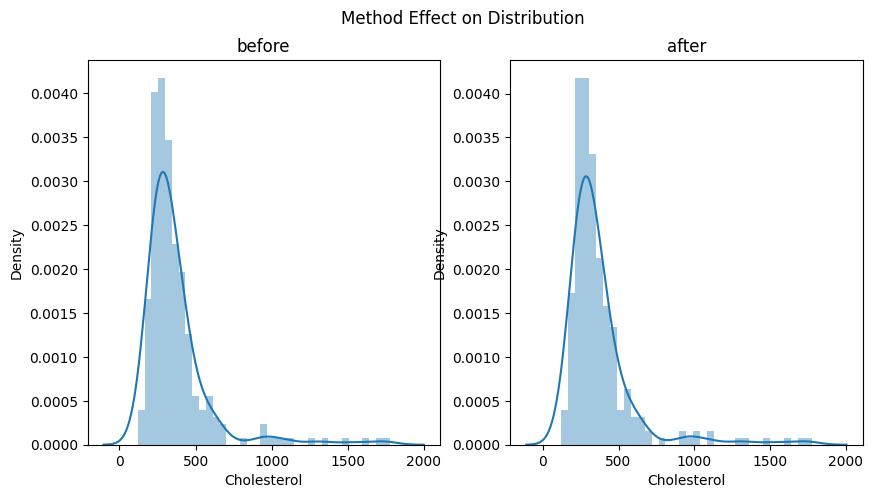

In [70]:
a=data["Cholesterol"]
data.dropna(axis=0,inplace=True)
data=plot_two(a,data["Cholesterol"])

## 2. Mean or Median Imputation 
Imputation -- means replacement . So we replace missing values with mean or median of variable 
* Used for ---> numerical varaibles : mean is used for normally distrubted variables, and median is used for skewed variables 
* Rules --> data is MCAR and only 5% is missing. However, it can still work MAR as missing values are often close to the mean or median
* Advantages --> easy and fast 
* Disadvantages --> can distort disrtibution and variance of a variable as well as covariance among variables. The the higher the percentage the greater the distortion
* Extra Note --> this technique is the most common in ML pipeline even sometimes when assumptions are not met due to it's simplicity

* Pandas Implementation--> 
```python 
    #mean 
    data["numerical"]=data["numerical"].fillna(np.mean(data["numerical"]))
    #median
    data["numerical"]=data["numerical"].fillna(np.nanmedian(data["numerical"]))
        
                                                                     
```




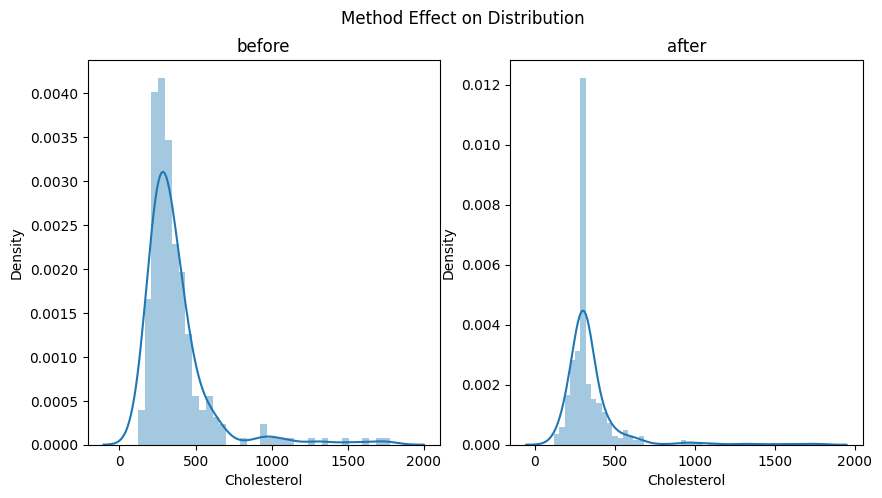

In [71]:
#median
a=data["Cholesterol"].fillna(np.nanmedian(data["Cholesterol"]))
data=plot_two(data["Cholesterol"],a)

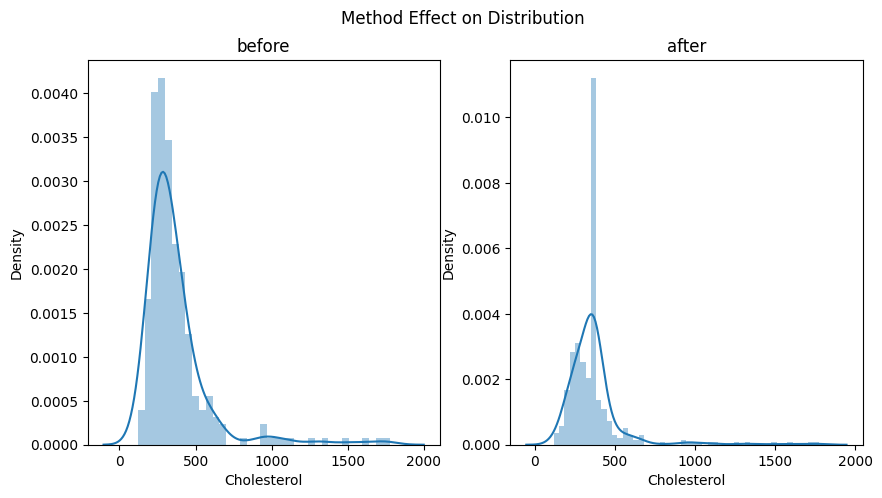

In [64]:
#mean
a=data["Cholesterol"].fillna(np.mean(data["Cholesterol"]))
data=plot_two(data["Cholesterol"],a)

## 3. Mode Imputation 
Imputation -- means replacement . So we replace missing values with the most frequent category. In practice this is a common method used for categorical variables.
* Used for ---> categorical variables 
* Rules --> data is MCAR and no more than 5 % is missing
* Advantages --> easy and fast 
* Disadvantages --> over-representation of most frequent category

* Pandas Implementation--> 
```python  
    data["categorical"]=data["categorical"].fillna(statistics.mode(data["categorical"]))

       

## 4. Adding a Missing Indicator 
This method can never be used alone but always used together with mean,median or mode imputation.In this method we create an extra column for the variable indicate whether or not it was originally missing.

* Used for ---> categorical and numerical variables 
* Rules --> data is MAR  
* Advantages --> capture importance of missing values if there is one
* Disadvantages --> will expand dataset and expansion can be unnecessary
* Pandas Implementation -->

```python
     data["variable"]=data.variable.fillna(np.mean(data.variable))
     data["variable_na"]=np.where(data.variable.isna(),1,0)
        
```

## 5. Aribrary Value Imputation 
In this method we replace the NaN values with "missing" indicator as if it is an extra category. This is the ***most common method* used for missing values in categorical variables**

A.For categorical 

* Rules --> No assumptions
* Advantages --> easy, fast and is very suitable if number of missing values are high. It also is useful for highlighting missing values
* Disadvantages --> if number of missing values is low, it could introduce a rare category 

* Pandas Implementation--> 
```python
    data["categorical"]=data["categorical"].fillna("missing")
`````




B.For numeric  

For numeric variables, this method is rarely used. However in many organisations and data science competetions you might find -9999 or 9999 replacing missing values. It is common practice in data collection.

* Rules --> No assumptions
* Advantages --> easy, fast and is useful for highlighting missing values
* Disadvantages --> distorts distribution, variance and covariance of original data. It can also create oultiers or mask existing outliers 


* Pandas Implementation--> 
```python
    data["numeric"]=data["numeric"].fillna(-9999)
`````




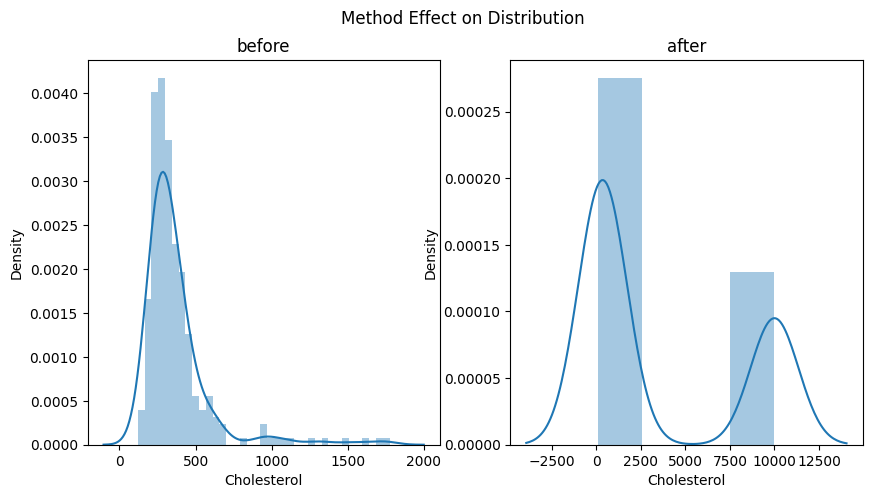

In [72]:
a=data["Cholesterol"].fillna(9999)
data=plot_two(data["Cholesterol"],a)

## 6. End of Distribution Imputation 

In this method we impute missing values with a value from the far end of a variable's distribution. It is close to arbitrary value imputation but more considerable.

* Used for --->  numerical variables 
* Rules --> data is MNAR  
* Advantages --> capture importance of missing values if there is one and it is fast
* Disadvantages --> distorts distribution, variance and covariance of original data. It can also create oultiers or mask existing outliers

* Pandas Implementation -->

--if variable is normally disrtributed the value is calculated as  mean + 3 * standard deviation 

-- if variable is skewed it is calculated as 75th percentile + 3 * IQR

``` python 
    #normal
    value=np.mean(data.numerical)+ 3 * np.std(data.numerical)
    data.numerical=data.numerical.fillna(value)
    #skewed
    value=np.nanquantile(data.numerical,0.75)+ 3 * (np.nanquantile(data.numerical,0.75)-np.nanquantile(data.numerical,0.25))
    data.numerical=data.numerical.fillna(value)
```

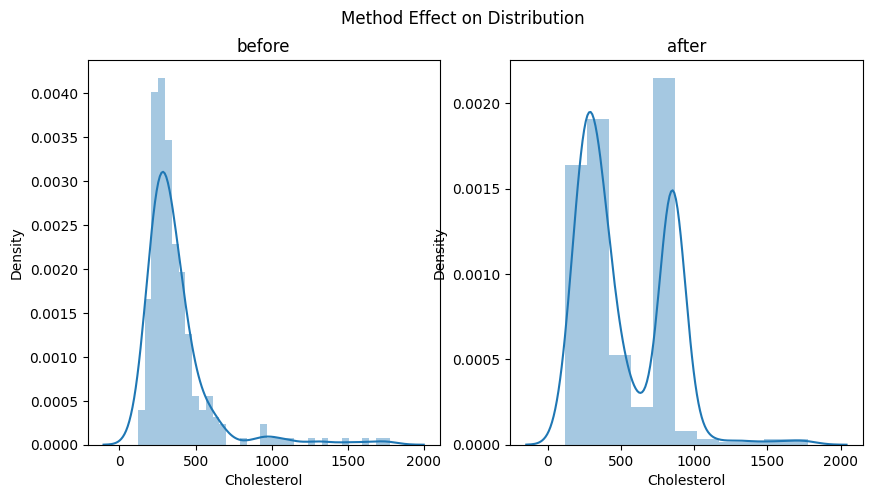

In [69]:
#normal
IQR=np.nanquantile(data.Cholesterol,0.75)-np.nanquantile(data.Cholesterol,0.25)
value=np.nanquantile(data.Cholesterol,0.75)+ 3 * IQR
a=data["Cholesterol"].fillna(value)
data=plot_two(data["Cholesterol"],a)